# ***Анализ рынка заведений общественного питания г.Москвы***
================================================================================================================

# Задание:

Подготовить исследование рынка по данным о заведениях общественного питания в Москве. Определить популярность в долгосрочной перспективе нового кафе. Проект отличается от других заведений идеей обслуживания гостей роботами.

# Описание данных

**Таблица rest_data:** 

 - id — идентификатор объекта;
 - object_name — название объекта общественного питания;
 - chain — сетевой ресторан;
 - object_type — тип объекта общественного питания;
 - address — адрес;
 - number — количество посадочных мест.

# Оглавление:

1. [Открытие данных](#1)
2. [Предобработка данных](#2)
3. [Анализ данных](#3)
   * [3.1. Cоотношение видов объектов общественного питания по количеству](#4)
   * [3.2. Cоотношение сетевых и несетевых заведений по количеству](#5)
   * [3.3. Cоотношение сетевых и несетевых предприятий по виду объекта](#6)
   * [3.4. Что характерно для сетевых заведений - много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#7)
   * [3.5. Среднее количество посадочных мест для каждого вида объекта. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#8)
   * [3.6. Информация об улице из столбца "address"](#9)
   * [3.7. График топ-10 улиц по количеству объектов. В каких районах Москвы находятся эти улицы?](#10)
   * [3.8. Число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?](#11)
   * [3.9. Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#12)
4. [Общий вывод](#13)
5. [Презентация](#14)

## Открытие данных
<a id="#1"></a>

In [1]:
#импортирую библиотеки: 
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

In [2]:
#посмотрим на данные отчета
rest= pd.read_csv('/datasets/rest_data.csv')
rest.sample(7)

,id,object_name,chain,object_type,address,number
13109,203606,Кафе Авилон,нет,кафе,"город Москва, Автозаводская улица, дом 23, кор...",63
403,140369,Кафе «Буба на Никитской»,нет,кафе,"город Москва, Малая Никитская улица, дом 10",30
4215,28698,СТОЛОВАЯ (ГБОУ «Школа №1558 имени Росалии де К...,нет,столовая,"город Москва, Ленская улица, дом 24",240
11179,183145,"Тайское мороженое, лимонады",нет,магазин (отдел кулинарии),"город Москва, Открытое шоссе, дом 9, строение 14А",4
10406,187782,Пекарня,нет,магазин (отдел кулинарии),"город Москва, Открытое шоссе, дом 5, корпус 11",0
8966,159622,ГОРЯЧАЯ ВЫПЕЧКА,нет,буфет,"город Москва, улица Мещерякова, дом 7, строение 1",4
10223,183163,Кофейня 47,нет,кафе,"город Москва, Каланчёвская улица, дом 47",30


In [3]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
#проверим наличие полных дубликатов
rest.duplicated().sum()

0

In [5]:
#проверим наличие дубликатов по совпадениям
print('Кол-во дубликатов:',rest[['object_name','address', 'object_type']].duplicated().sum())

Кол-во дубликатов: 171


In [6]:
#посмотрим на уникальные значения по типу и сетевому признаку
print('Уникальные значения по типу заведения:', rest['object_type'].unique())
print('Уникальные значения по сетевому признаку:', rest['chain'].unique())

Уникальные значения по типу заведения: ['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']
Уникальные значения по сетевому признаку: ['нет' 'да']


In [7]:
#посмотрим на посадочные места
rest['number'].value_counts()

0      1621
40      835
20      727
30      685
10      644
       ... 
491       1
675       1
455       1
167       1
495       1
Name: number, Length: 315, dtype: int64

✔️ **Вывод**

Отчет представляет из себя выгрузку данных предприятий общественного питания. Данные содержат 15366 строк с названиями точек питания, их точного адреса местоположения, идентификационные признаки, типы заведения и признаки к сетевой принадлежности. Пропусков нет, но в отчете есть задублированные данные с полным совпадением названия точки, ее адреса и типа. Всего в отчете таким образом продублировалась 171 строка. Их можно будет удалить. Типы данных в колонках соответствуют их соодержанию. В названии типов заведений есть длинные названия, которые лучше сократить для более удобного восприятия - так 'предприятие быстрого обслуживания' переименуем в 'пбо', и 'магазин (отдел кулинарии)', который подразумевает скорее всего собственное производтво магазина, переименуем в 'магазин_сп'. Переименуем также в колонке "chain" явную принадлежность. В данных о количестве посадочных мест есть заведения с нулевыми значениями, скорее всего это точки фастфуда, у которых нет требований для посадки посетителя. 

## Предобработка данных
<a id="#2"></a>

In [8]:
#удалим дубликаты
rest = rest.drop_duplicates(subset=['object_name','address','object_type']).reset_index(drop=True)
#rest.info()

In [59]:
from pymystem3 import Mystem
from collections import Counter
m = Mystem()
lemmas = []
for element in rest['object_name']:
    lemma = m.lemmatize(element)
    lemmas.extend(lemma)

unique_lemmas = Counter(lemmas)
sorted(unique_lemmas.items(), key = lambda pair: pair[1], reverse=True)

[(' ', 14656),
 ('\n', 12707),
 (' «', 2387),
 ('»\n', 2329),
 ('кафе', 1802),
 ('столовая', 1588),
 ('-', 962),
 ('школа', 927),
 ('№', 881),
 ('ресторан', 607),
 ('при', 597),
 ('гбоу', 467),
 ('бар', 460),
 ('.', 426),
 ('пицца', 382),
 ('. ', 379),
 ('шаурма', 350),
 ('буфет', 318),
 ('суша', 274),
 ('кофе', 255),
 ('пекарня', 251),
 ('и', 212),
 ('бургер', 202),
 ('с', 197),
 ('KFC', 189),
 ('шоколадница', 186),
 ('ШК', 172),
 ('1', 171),
 ('макдоналдс', 170),
 ('кинг', 167),
 ('сош', 161),
 (', ', 140),
 ('в', 133),
 ("'", 129),
 (' (', 127),
 (')\n', 127),
 ('кофейня', 127),
 ('донер', 126),
 ('на', 123),
 ('теремок', 116),
 ('выпечка', 116),
 ('кухня', 116),
 ('колледж', 113),
 ('питание', 107),
 ('кальянный', 107),
 ('хаус', 105),
 ('хинкальный', 103),
 ('картошка', 101),
 ('чайхон', 100),
 ('домино', 100),
 ('крошка', 99),
 ('пиццерия', 96),
 ('кебаб', 94),
 ('гоу', 89),
 ('милти', 83),
 ('Wok', 82),
 ('клуб', 78),
 ('Lounge', 78),
 ('гриль', 77),
 ('папа', 77),
 ('старый', 7

In [10]:
#переименуем название типов заведений
rest['object_type'] = rest['object_type'].str.replace('предприятие быстрого обслуживания', 'пбо')
rest['object_type'] = rest['object_type'].str.replace('магазин \(отдел кулинарии\)', 'магазин_сп')
rest['chain'] = rest['chain'].str.replace('нет', 'Не сетевое')
rest['chain'] = rest['chain'].str.replace('да', 'Сетевое')
print('Уникальные значения по типу заведения:', rest['object_type'].unique())

Уникальные значения по типу заведения: ['кафе' 'столовая' 'закусочная' 'пбо' 'ресторан' 'кафетерий' 'буфет' 'бар'
 'магазин_сп']


✔️ Предобработка выполнена - дубликаты удалены, названия у типов заведений заменены.

## Анализ данных
<a id="#3"></a>

### Cоотношение видов объектов общественного питания по количеству.
<a id="#4"></a>

In [11]:
rest_type = rest.groupby('object_type').agg({'object_type':'count'})
rest_type.columns = ['count']
rest_type = rest_type.reset_index().sort_values(by='count',ascending=False)
rest_type

,object_type,count
3,кафе,6017
8,столовая,2575
7,ресторан,2275
6,пбо,1891
0,бар,853
1,буфет,571
4,кафетерий,393
2,закусочная,348
5,магазин_сп,272


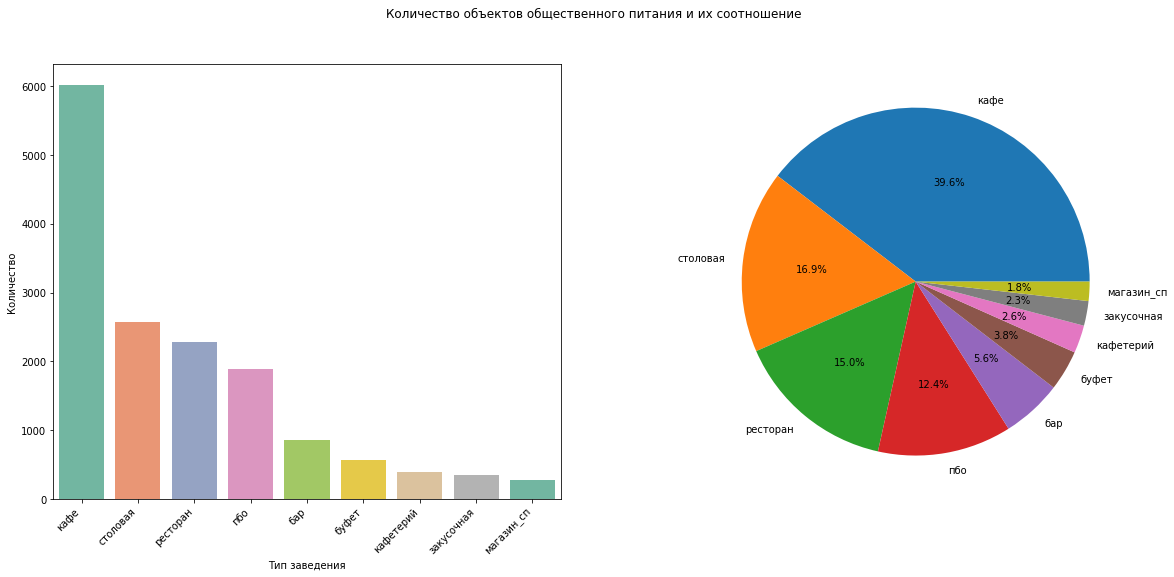

In [12]:
#построим график
plt.figure(figsize=(20,8))
plt.suptitle('Количество объектов общественного питания и их соотношение')

plt.subplot(121)
rt = sns.barplot(data=rest_type, x='object_type', y='count', palette="Set2")
rt.set_xticklabels(rt.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.grid(False)
plt.xlabel('Тип заведения')
plt.ylabel('Количество')

plt.subplot(122)
plt.pie(rest_type['count'], labels=rest_type['object_type'], autopct='%1.1f%%')
plt.show()

✔️ **Вывод**

Около 40% от всего количества заведений общественного питания в Москве составляют "кафе". Категория "кафе" опережает другие по численности, т.к. кафе - это небольшое заведение общественного питания и отдыха с ограниченным ассортиментом. Для открытия кафе не требуется арендовать большие площади, не требуется создавать большой штат персонала (т.к. кухня урезана или полностью отсутствует), слабо зависит от места расположения (люди с радостью посещают кафе как во время прогулок по городу, так и в пределах района проживания), имеет относительно небольшой средний чек, например, по сравнению с ресторанами, куда люди ходят чаще по особому поводу. В топ-5 также входят - столовая, рестораны, пбо (скорее всего фастфуды) и бары. Самыми непопулярными являются магазины с собственным производством, закусочные и кафетерии.

### Cоотношение сетевых и несетевых заведений по количеству.
<a id="#5"></a>

In [13]:
#посмотрим на количество по сетевому признаку
rest_chain = rest.groupby('chain').agg({'id':'count'}).sort_values(by='id', ascending=False)
rest_chain['chain'] = rest_chain.index
rest_chain = rest_chain.rename(columns={'id':'count'})
rest_chain = rest_chain.reset_index(drop=True)
rest_chain

,count,chain
0,12245,Не сетевое
1,2950,Сетевое


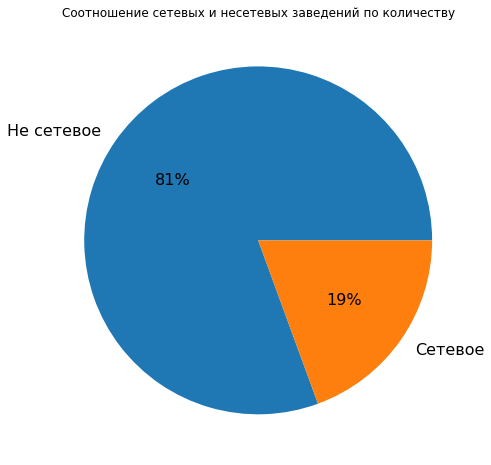

In [14]:
#построим график
rest['chain'].value_counts().plot(kind='pie', subplots=True, figsize=(8, 8), legend='', autopct='%1.0f%%', textprops={'fontsize': 16})
plt.axis('off')
plt.title('Cоотношение сетевых и несетевых заведений по количеству')
plt.show()

✔️ **Вывод**

Количество несетевых объектов в 4 раза превышает количество сетей общественного питания - таких заведений более 12 тыс.

### Cоотношение сетевых и несетевых предприятий по виду объекта.
<a id="#6"></a>

In [15]:
#создадим новую таблицу
chain_object = rest.copy()
chain_object = chain_object.groupby(['object_type','chain'],as_index=False).object_name.count()
chain_object.sample(5)

,object_type,chain,object_name
5,закусочная,Сетевое,56
12,пбо,Не сетевое,1107
9,кафетерий,Сетевое,51
15,ресторан,Сетевое,541
17,столовая,Сетевое,3


In [16]:
#посомтрим на распределение
chains = rest.copy()
chains = chains.groupby('object_type')['chain'].value_counts(normalize=True).map(lambda x: '{:.0%}'.format(x))
chains

object_type  chain     
бар          Не сетевое     96%
             Сетевое         4%
буфет        Не сетевое     98%
             Сетевое         2%
закусочная   Не сетевое     84%
             Сетевое        16%
кафе         Не сетевое     77%
             Сетевое        23%
кафетерий    Не сетевое     87%
             Сетевое        13%
магазин_сп   Не сетевое     71%
             Сетевое        29%
пбо          Не сетевое     59%
             Сетевое        41%
ресторан     Не сетевое     76%
             Сетевое        24%
столовая     Не сетевое    100%
             Сетевое         0%
Name: chain, dtype: object

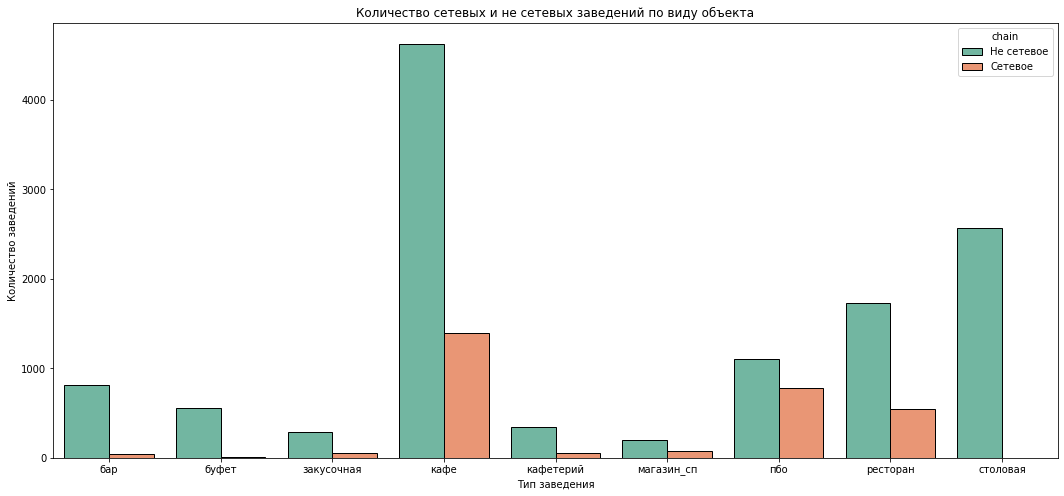

In [17]:
#построим график
plt.figure(figsize=(18,8))
ax=sns.barplot(data=chain_object,x='object_type',y='object_name',hue='chain', palette="Set2", ec='black')
ax.set_title('Количество сетевых и не сетевых заведений по виду объекта')
ax.set_xlabel('Тип заведения')
ax.set_ylabel('Количество заведений')

plt.show()

✔️ **Вывод**

В каждом виде объекта преобладают несетевые типы. Особенно в "столовых" где 100% результат - еще никто не решился в Москве открыть сеть из подобных заведений. Сеть кафе - самое распростараненный вид бизнеса в сегменте общественного питания в Москве из сетевых видов. Далее идут ларьки с фастфудом и рестораны.  

### Что характерно для сетевых заведений -  много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
<a id="#7"></a>

In [18]:
#cоздадим таблицу с количеством заведений в сети и количеством посадочных мест.
rest_chain_num = rest.copy()
rest_chain_num = rest_chain_num[rest_chain_num ['chain'] == 'Сетевое']\
                  .groupby('object_name')\
                  .agg({'id':'count', 'number':'mean'})\
                  .reset_index()
rest_chain_num.columns = ['object_name', 'count_object', 'mean_number']
rest_chain_num.sample(7)

,object_name,count_object,mean_number
8,CORREAS,1,32.00
540,РОСТИКС KFC,1,85.00
115,Баскин Роббинс,12,11.25
14,Costa Coffee,5,18.80
5,Bubbleology,1,6.00
301,Кафе «Поль Бейкери»,1,3.00
320,Кафе «Якитория»,4,116.25


In [103]:
def kat_num (set):
    if set['mean_number'] <= 20:
        return 'мало мест'
    elif set['mean_number'] < 45:
        return 'мест меньше среднего'
    elif set['mean_number'] < 83:
        return 'мест больше среднего' 
    return 'много мест'
rest_chain_num['kat'] = rest_chain_num.apply(kat_num, axis=1)
rest_chain_num.sample(7)

,object_name,count_object,mean_number,kat
420,Маки-маки,1,60.000000,мест больше среднего
513,Прайм-кафе,7,30.428571,мест меньше среднего
221,Иль Патио Планета Суши,9,106.000000,много мест
287,Кафе «Кружка»,4,194.000000,много мест
576,Ресторан «Якитория»,1,25.000000,мест меньше среднего
191,Добрынинский и партнёры,1,7.000000,мало мест
450,Обжорный ряд,2,13.500000,мало мест


In [67]:
#посмотрим на характеристики выборки
rest_chain_num.describe()

,count_object,mean_number
count,723.000000,723.000000
mean,4.080221,60.305559
std,12.528712,56.162749
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,45.000000
75%,2.000000,83.750000
max,155.000000,356.000000


Text(27.125, 0.5, 'Количество заведений')

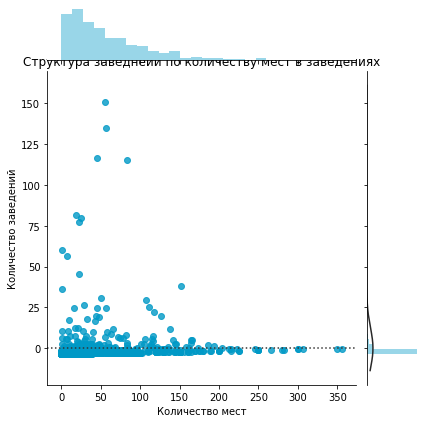

In [82]:
sns.jointplot(x='mean_number', y='count_object',data=rest_chain_num, kind="resid", color='#0099C6')
plt.title("Структура заведнеий по количеству мест в заведениях")
plt.xlabel("Количество мест")
plt.ylabel("Количество заведений")

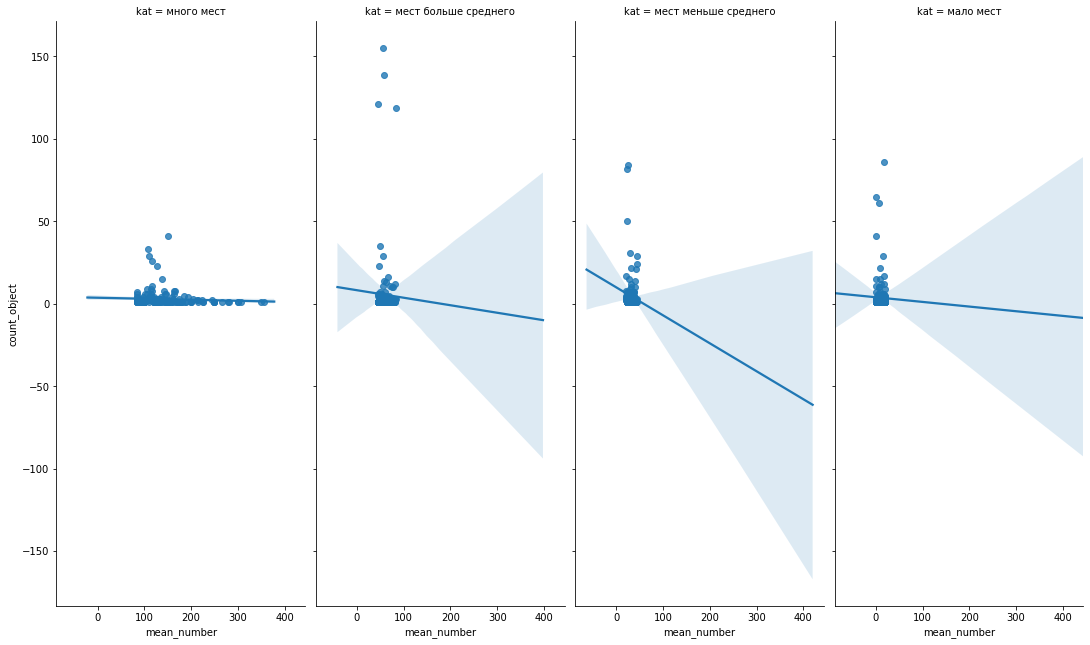

In [102]:
g = sns.lmplot(x='mean_number',
           y='count_object',
           col='kat',
           data=rest_chain_num)
g.fig.set_figheight(10)
g.fig.set_figwidth(15)

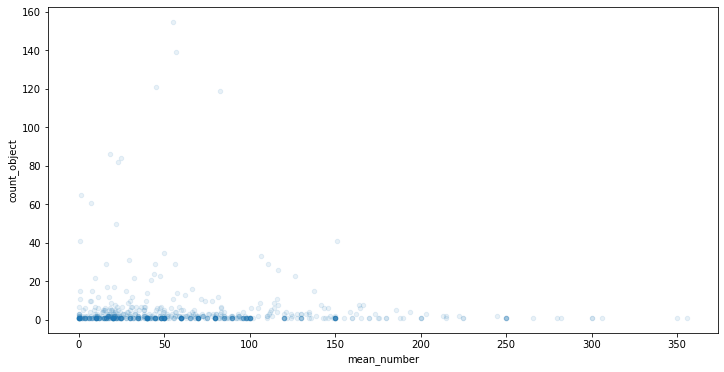

In [63]:
ar = rest_chain_num.plot(x='mean_number', y='count_object', kind="scatter", figsize=(12,6),alpha=0.1) 

✔️ **Вывод** 

Для большей части сетевых заведений характерно малое число заведений (не более 5) с большим количеством посадочных мест (в среднем 45).

###  Среднее количество посадочных мест для каждого вида объекта. Какой вид предоставляет в среднем самое большое количество посадочных мест?
<a id="#8"></a>

In [21]:
#посмотрим на сводные данные
mean_num = rest.copy()
mean_num = (mean_num.groupby(['object_type'])
       .agg({'number': 'mean'})
       .sort_values(by = ['number'], ascending = False)
       .reset_index())
mean_num.columns = ['object_type','mean_number']
mean_num

,object_type,mean_number
0,столовая,130.367767
1,ресторан,97.047473
2,буфет,51.572680
3,бар,43.602579
4,кафе,39.875187
5,пбо,20.786885
6,кафетерий,9.221374
7,закусочная,7.663793
8,магазин_сп,5.610294


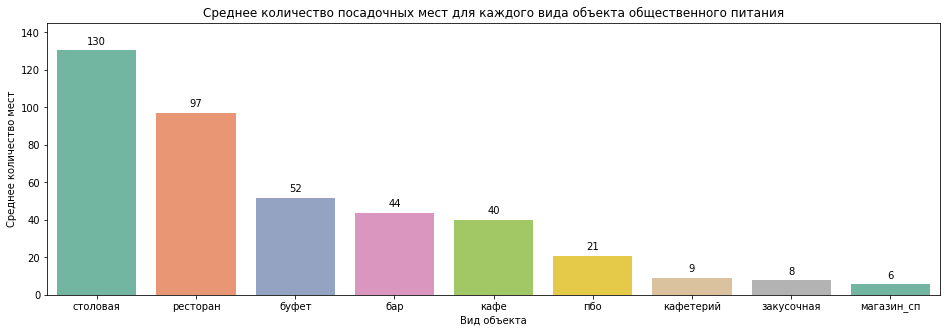

In [22]:
#построим график
plt.figure(figsize = (16, 5))
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания')
mean_num_gis = sns.barplot(x = 'object_type', y = 'mean_number', data = mean_num, palette="Set2")
for p in mean_num_gis.patches:
    mean_num_gis.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9),
                   textcoords = 'offset points')
mean_num_gis.set_ylim(0, 145)
plt.ylabel('Среднее количество мест')
plt.xlabel('Вид объекта')
plt.show()

✔️ **Вывод**

Столовые ожидаемо лидируют по показателю среднего числа посадочных мест по типу заведений. Подобные заведения одновременно могут посещать более 100 человек. За счет этого и ведется бизнес - низкий средний чек за не очень качественную еду, зато за счет количества увеличивается прибыль. Рестораны не на много отстают, ведь в их число входят популярнейшие семейные заведения с западным меню, рассчитанные на быстрый перекус.Бары, буфеты и кафе держатся практически на одном уровне. В закусочных и магазинах с собственным производством традиционно негде присесть впринципе.

###  Информация об улице из столбца address
<a id="#9"></a>

In [23]:
rest_adrs = rest.copy()
#выделим улицу
rest_adrs['street'] = rest_adrs['address'].apply(lambda x: x[x.find('город москва') + 15 : x.find('дом') - 2])
rest_adrs.sample(7)

,id,object_name,chain,object_type,address,number,street
303,124334,"Выпечка, кофейня",Не сетевое,пбо,"город Москва, Гурьевский проезд, дом 25, корпус 1",0,Гурьевский проезд
8054,152190,ГБОУ Лицей № 1574,Не сетевое,буфет,"город Москва, 4-й Лесной переулок, дом 6",110,4-й Лесной переулок
4326,138012,Столовая при школе № 2107,Не сетевое,столовая,"город Москва, Большая Переяславская улица, дом...",130,Большая Переяславская улица
7072,153407,Кафе на Вучетича,Не сетевое,кафе,"город Москва, улица Вучетича, владение 2А",40,"улица Вучетича, владение"
6197,29461,Школьно-базовая столовая,Не сетевое,столовая,"город Москва, Изюмская улица, дом 61, корпус 2",112,Изюмская улица
7200,28965,ЗАГОРЬЕ ШК. 902,Не сетевое,столовая,"город Москва, Педагогическая улица, дом 3",240,Педагогическая улица
6626,23411,Столовая,Не сетевое,столовая,"город Москва, Рублёвское шоссе, дом 28",150,Рублёвское шоссе


###  График топ-10 улиц по количеству объектов. В каких районах Москвы находятся эти улицы?
<a id="#10"></a>

In [24]:
#определим топ-10 улиц
street_pivot=(rest_adrs.groupby('street')['id']\
              .agg(['count'])).sort_values(by='count', ascending=False).round(0).astype(int).head(10)
street_pivot = street_pivot.reset_index()
street_pivot

,street,count
0,проспект Мира,197
1,Профсоюзная улица,180
2,Ленинградский проспект,169
3,Пресненская набережная,165
4,Варшавское шоссе,154
5,Ленинский проспект,147
6,проспект Вернадского,126
7,Кутузовский проспект,114
8,Каширское шоссе,102
9,Кировоградская улица,101


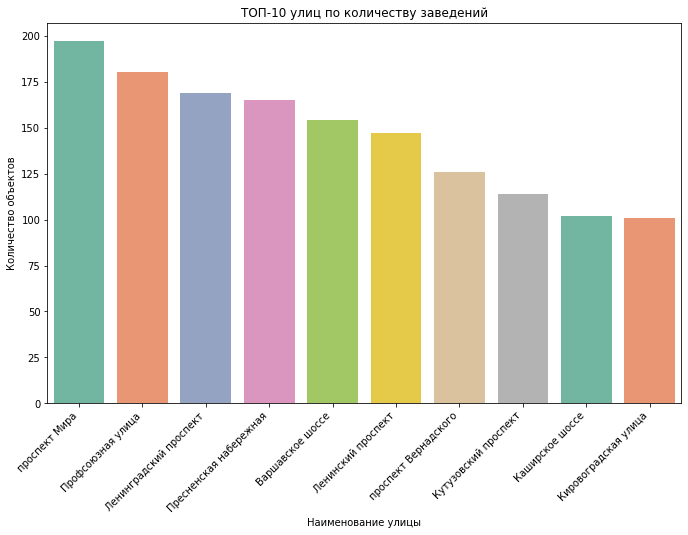

In [25]:
#построим график
plt.figure(figsize = (25, 7))
plt.subplot(121)
street_pivot_gis= sns.barplot(data=street_pivot, x='street', y='count', palette="Set2")
street_pivot_gis.set_xticklabels(street_pivot_gis.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.grid(False)
plt.title('ТОП-10 улиц по количеству заведений')
plt.ylabel('Количество объектов')
plt.xlabel('Наименование улицы')
plt.show()

In [26]:
#для определения района воспользуемся данными из открытых источников
streets_mskw= pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
streets_mskw.columns = ['street', 'okrug','areaid', 'area']
streets_mskw.sample(7)

,street,okrug,areaid,area
1417,3-я улица Лазенки,42,ЗАО,Район Ново-Переделкино
2749,1-й Силикатный проезд,92,СЗАО,Район Хорошево-Мневники
442,Страстной бульвар,19,ЦАО,Тверской район
1974,Пакгаузное шоссе,59,САО,Головинский район
1934,Ижорская улица,60,САО,Дмитровский район
694,1-й Иртышский проезд,25,ВАО,Район Гольяново
2311,Бибиревская улица,71,СВАО,Алтуфьевский район


In [27]:
#добавим район и округ
streets_merge = pd.merge(left = street_pivot, right = streets_mskw[['street', 'areaid', 'area']], on = 'street', how = 'left')
streets_merge.sort_values(by='count', ascending=False)

,street,count,areaid,area
0,проспект Мира,197,СВАО,Алексеевский район
2,проспект Мира,197,СВАО,Район Марьина роща
3,проспект Мира,197,СВАО,Останкинский район
4,проспект Мира,197,СВАО,Район Ростокино
5,проспект Мира,197,СВАО,Район Свиблово
6,проспект Мира,197,ЦАО,Мещанский район
1,проспект Мира,197,СВАО,Ярославский Район
11,Профсоюзная улица,180,ЮЗАО,Обручевский район
12,Профсоюзная улица,180,ЮЗАО,Район Теплый Стан
10,Профсоюзная улица,180,ЮЗАО,Район Коньково


In [28]:
#посчитаем количесвто представленных районов из топ-10
area_count = streets_merge.groupby(['area']).agg({'street': 'count'}).sort_values(by = 'street', ascending = False).head(10).reset_index()
area_count.columns = ['area','count']
area_count

,area,count
0,Район Чертаново Центральное,2
1,Донской район,2
2,Ломоносовский район,2
3,Район Проспект Вернадского,2
4,Обручевский район,2
5,Район Теплый Стан,2
6,Район Нагатино-Садовники,2
7,Район Чертаново Южное,2
8,Район Тропарево-Никулино,2
9,Район Гагаринский,2


In [29]:
#общая сводная по районам
area_pivot=(streets_mskw.groupby('area')['street'].agg(['count'])).sort_values(by='count', ascending=False).round(0).astype(int).head(10)
area_pivot = area_pivot.reset_index()
area_pivot

,area,count
0,Тверской район,179
1,Таганский район,173
2,Басманный район,152
3,Пресненский район,144
4,Район Хамовники,140
5,Район Южное Бутово,90
6,Красносельский район,89
7,Даниловский район,88
8,Мещанский район,87
9,Район Замоскворечье,86


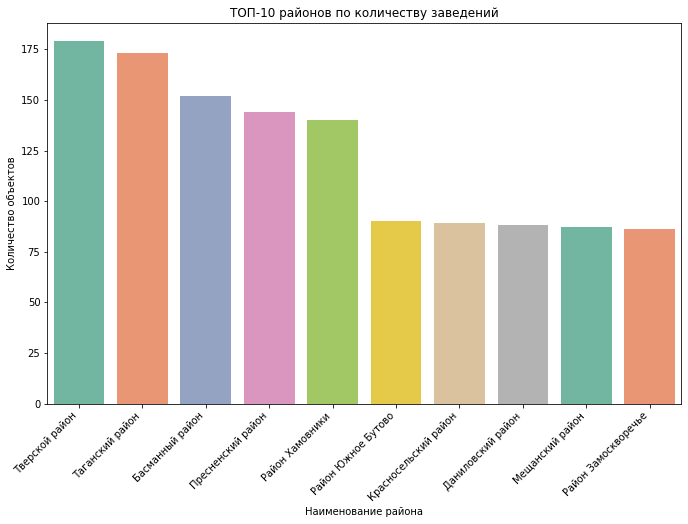

In [30]:
#построим график
plt.figure(figsize = (25, 7))
plt.subplot(121)
area_pivot_gis= sns.barplot(data=area_pivot, x='area', y='count', palette="Set2")
area_pivot_gis.set_xticklabels(area_pivot_gis.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.grid(False)
plt.title('ТОП-10 районов по количеству заведений')
plt.ylabel('Количество объектов')
plt.xlabel('Наименование района')
plt.show()

In [31]:
areaid_count = streets_merge.groupby(['areaid']).agg({'street': 'count'}).sort_values(by = 'street', ascending = False).head(10).reset_index()
areaid_count.columns = ['areaid','count']
areaid_count

,areaid,count
0,ЮАО,14
1,ЮЗАО,14
2,ЗАО,7
3,СВАО,6
4,САО,4
5,ЦАО,3


In [32]:
#общая сводная по округу
areaid_pivot=(streets_mskw.groupby('areaid')['street'].agg(['count'])).sort_values(by='count', ascending=False).round(0).astype(int).head(10)
areaid_pivot = areaid_pivot.reset_index()
areaid_pivot

,areaid,count
0,ЦАО,1200
1,ВАО,504
2,ЗАО,460
3,САО,410
4,СВАО,408
5,ЮВАО,382
6,ЮАО,372
7,ЮЗАО,289
8,СЗАО,252
9,Зеленоград,121


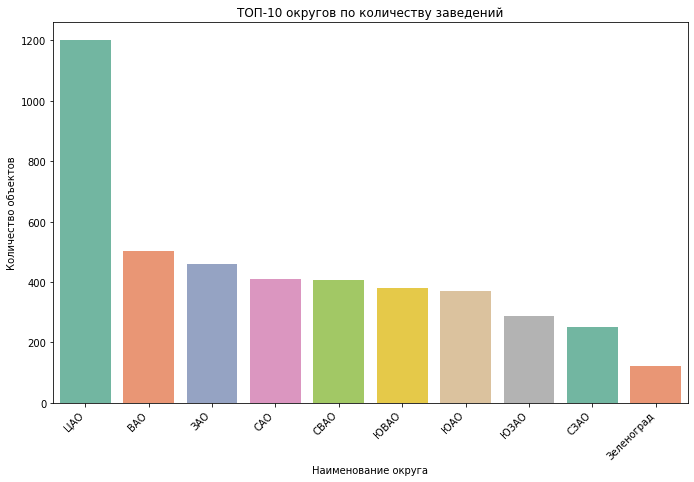

In [33]:
#построим график
plt.figure(figsize = (25, 7))
plt.subplot(121)
areaid_pivot_gis= sns.barplot(data=areaid_pivot, x='areaid', y='count', palette="Set2")
areaid_pivot_gis.set_xticklabels(areaid_pivot_gis.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.grid(False)
plt.title('ТОП-10 округов по количеству заведений')
plt.ylabel('Количество объектов')
plt.xlabel('Наименование округа')
plt.show()

✔️ **Вывод**

Варшавское шоссе имеет длину в 22,5 км, и является самой протяженной улицей в Москве, однако наибольшее количество точек питания расположилось на проспекте Мира. И даже Профсоюзная улица, которая расположилалсь в «спальном квартале» с большим количеством жилых домов, средств инфраструктуры не смогла занять лидерство. На месторасположение точки в большей степени влияет  проходимость улицы и уже "протоптанная дорожка" к этому месту. Абсолютный лидер из районов по количеству представленных точек питания из топ-10 не выявился, однако, по общему количеству первое место занимает Тверской район. Из административных округов явно выделяется Центральный - более чем в два раза он опережает второй по числу Восточный.

###  Число улиц с одним объектом общественного питания. В каких районах Москвы находятся эти улицы?
<a id="#11"></a>

In [34]:
#создадим еще раз отдельную таблицу с названием улицы и района 
streets_merge2 = pd.merge(left = rest_adrs, right = streets_mskw[['street', 'areaid', 'area']], on = 'street', how = 'left')
streets_merge2=(streets_merge2.groupby(['street', 'area'])['id'].agg(['count'])).sort_values(by='count', ascending=False).round(0).astype(int)
streets_merge2 = streets_merge2.reset_index()

# посчитаем количесвто улиц с одним объектом
one_object = streets_merge2.copy()
one_object = one_object.query('count == 1')
print('Количество улиц с одним объектом общественного питания -',len(one_object))

Количество улиц с одним объектом общественного питания - 559


In [35]:
area_one_object=(one_object.groupby('area')['street'].agg(['count'])).sort_values(by='count', ascending=False).round(0).astype(int).head(10)
area_one_object = area_one_object.reset_index()
area_one_object

,area,count
0,Таганский район,27
1,Район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,19
5,Район Марьина роща,17
6,Район Арбат,17
7,Мещанский район,16
8,Район Сокольники,15
9,Район Замоскворечье,14


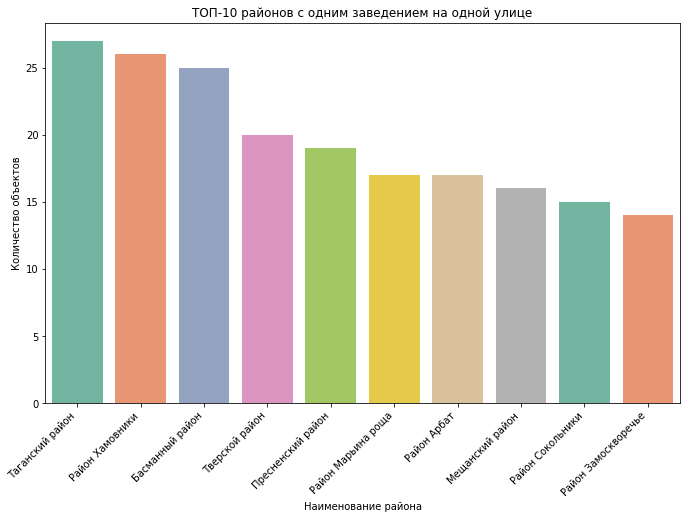

In [36]:
#построим график
plt.figure(figsize = (25, 7))
plt.subplot(121)
areaid_pivot_gis= sns.barplot(data=area_one_object, x='area', y='count', palette="Set2")
areaid_pivot_gis.set_xticklabels(areaid_pivot_gis.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.grid(False)
plt.title('ТОП-10 районов с одним заведением на одной улице')
plt.ylabel('Количество объектов')
plt.xlabel('Наименование района')
plt.show()

✔️ **Вывод**

В топе по количеству одной точки питания на одной улице на районе практически все теже территории. Лидером стал Таганский район, хотя по общему количеству он занимает уверенное второе место. Такое распределение можно назвать удачным - нет перегруза на улицах (на каждом шагу не мозолят глаза точки с едой), для бизнеса не мешают конкуренты. 

###  Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
<a id="#12"></a>

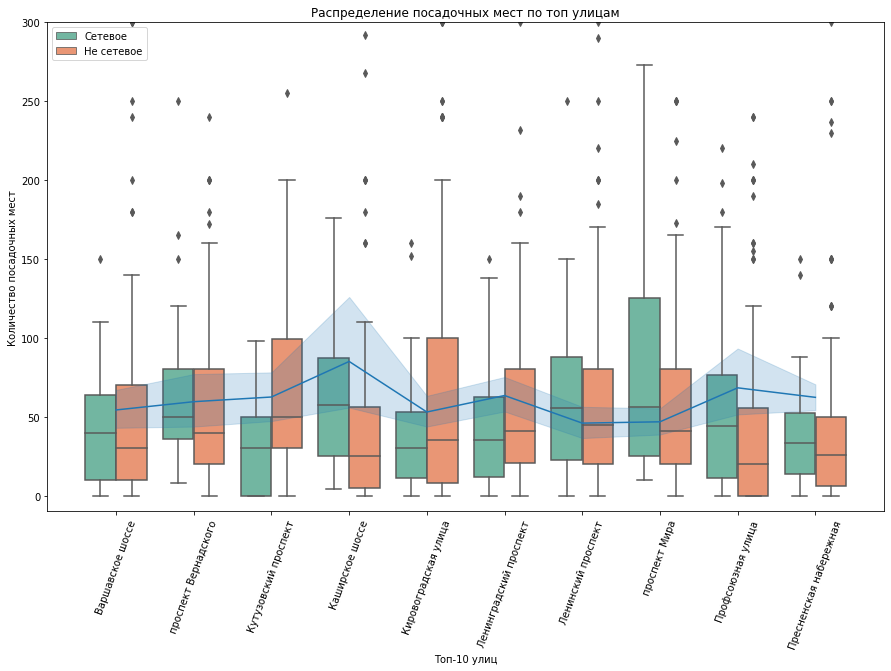

In [37]:
#формируем массив
top_street_array = np.array(street_pivot.reset_index()['street'])

#передаем массив для среза
top_streets_seats = rest_adrs.query('street in @top_street_array').reset_index()

#создаем новую таблицу
top_streets_seats = top_streets_seats.merge(street_pivot, how='left', on = 'street')

#выводим boxplot
fig, ax = plt.subplots(figsize = (15,9))
sns.boxplot(data = top_streets_seats,x='street',y='number', hue="chain", palette="Set2")
sns.lineplot(data = top_streets_seats,x='street',y='number')
plt.xticks(rotation=70)
plt.ylim(-10, 300)
plt.title('Распределение посадочных мест по топ улицам')
plt.xlabel('Топ-10 улиц')
plt.ylabel('Количество посадочных мест')
plt.show()

✔️ **Вывод**

Большинство заведений с большим количеством объектов имеют до 100 посадочных мест.Больше всего на Кутузовском проспекте и проспекте Мира, меньше - на Кировоградской улице, Варшавском шоссе и Пресненской набережной. В сетевых заведениях обычно больше посадочных мест, в исключение попадает Ленинградский и Кутузовский проспекты. Так же следует обратить внимаение на то, что в сетевых заведениях меньше выбросов, полагаю связано с тем, что сетевые заведения придерживаются одного формата.

##  Общий вывод
<a id="#13"></a>

**Анализ данных позволил увидеть, что:**

- Около 40% от всего количества заведений общественного питания в Москве составляют "кафе". Категория "кафе" опережает другие по численности, т.к. кафе - это небольшое заведение общественного питания и отдыха с ограниченным ассортиментом. 

- В топ-5 также входят - столовая, рестораны, пбо (скорее всего фастфуды) и бары. Самыми непопулярными являются магазины с собственным производством, закусочные и кафетерии.

- Количество несетевых объектов в 4 раза превышает количество сетей общественного питания - таких заведений более 12 тыс.

- В каждом виде объекта преобладают несетевые типы.  Еще никто не решился в Москве открыть сеть из "столовых" - 100% результат. Сеть кафе - самое распростараненный вид бизнеса в сегменте общественного питания в Москве. Далее идут ларьки с фастфудом и рестораны.

- Для большей части сетевых заведений характерно малое число заведений (не более 5) с большим количеством посадочных мест (в среднем 45).

- Столовые по типу заведений также лидируют по показателю среднего числа посадочных мест. Подобные заведения одновременно могут посещать более 100 человек. Рестораны не на много отстают, а бары, буфеты и кафе держатся практически на одном уровне.

- Наибольшее количество точек питания расположилось на проспекте Мира. В топе также самые длинные улицы - Варшавское шоссе и Профсоюзная улица.

- Абсолютный лидер из районов по количеству представленных точек питания из топ-10 не выявился, однако, по общему количеству первое место занимает Тверской район. Из административных округов явно выделяется Центральный - более чем в два раза он опережает второй по числу Восточный.

- В топе по количеству одной точки питания на одной улице на районе практически все теже территории. Лидером стал Таганский район, хотя по общему количеству он занимает уверенное второе место.

- Большинство заведений с большим количеством объектов имеют до 100 посадочных мест.Больше всего на Кутузовском проспекте и проспекте Мира, меньше - на Кировоградской улице, Варшавском шоссе и Пресненской набережной. В сетевых заведениях обычно больше посадочных мест, в исключение попадает Ленинградский и Кутузовский проспекты.


**Рекомендации о виде заведения, количестве посадочных мест, а также районе расположения:**

Рекомендую открыть кафе с посадкой до 50 человек в центральном административном округе, например, Таганском районе, т.к. роботы не пригодны для обслуживания требовательных посетителей и могут справляться только с определенным перечнем задач. В районе много улиц с одним заведением, то есть существует возможность открыть новое кафе с хорошей проходимостью людей. Также особенность кафе - роботы - должна предполагать удобную доступность. Аренда в Таганском районе скорее всего стоит меньше, чем в Тверском или Пресненском.

##  Презентация
<a id="#14"></a>

Посмотреть презентацию можно здесь:
    https://disk.yandex.ru/i/ALR8q1J0q5zNcg 